In [2]:
#%matplotlib notebook
import sys
import os
#messi
# Standard modules used through the notebook 
import numpy as np
import matplotlib.pyplot as plt

# Tools specific for this tutorial
# They are in the .py files accompaining this notebook 
from bundle_adjust import ba_utils      # bundle adjustment tools
from bundle_adjust import ba_timeseries

from IS18 import vistools       # display tools
from IS18 import utils          # IO tools
from IS18 import rectification  # rectification tools
from IS18 import stereo         # stereo tools
from IS18 import triangulation  # triangulation tools

import srtm4                  
import s2p
import pickle
import rpcm
import glob
import json

# Display and interface settings (just for the notebook interface)
%load_ext autoreload
%autoreload 2
np.set_printoptions(linewidth=150)

## Skysat Bundle Adjustment Pipeline 

Allows to adjust a set of views and add new views to a set of already adjusted images.

### Experiment name 

In [3]:
#exp_name = 'skysat_L1A/dona_juana2_9'
scene_name = 'skysat_L1B_morenci'
input_dir = 'data'
output_dir = 'exp'

scene = ba_timeseries.Scene(input_dir, output_dir, scene_name, 'v2', compute_aoi_masks=False)

#############################################################
Loading scene skysat_L1B_morenci...

Found 6 images

Found 1 different dates in the scene timeline

Successfully loaded scene skysat_L1B_morenci
#############################################################




### Load scene

In [5]:
timeline_indices = [0]

scene.load_data_from_dates(timeline_indices)

6 new images for bundle adjustment ! 

Loading 6 image rpcs / 6
Done!

Loading 6 image crops / 6
Done!



### Set bundle adjustment input and load pipeline

In [6]:
scene.set_ba_input_data()

from bundle_adjust.ba_pipeline import BundleAdjustmentPipeline

ba_pipeline = BundleAdjustmentPipeline(scene.ba_input_data, skysat=True, \
                                       use_masks=False, feature_detection_lib='s2p', display_plots=True)
#ba_pipeline.display_aoi()


Bundle Adjustment input data is ready !



### Run bundle adjustment

Approximating RPCs as Perspective projection matrices
6 projection matrices / 6 (0 err)
Done!

Running skysat s2p based feature detection...

Parameters:
      use_masks:    False
      matching_thr: 0.6


Found 39625 keypoints in image 0
Found 35271 keypoints in image 1
Found 49878 keypoints in image 2
Found 43177 keypoints in image 3
Found 49379 keypoints in image 4
Found 47859 keypoints in image 5

Detected features saved!

...done in 12.65385228022933 seconds

Computing pairs to be matched...

13 / 15 pairs to be matched
13 new pairs to be matched

...done in 0.012990147806704044 seconds

Matching...

Pair (0,1) -> 4595 matches
Pair (0,3) -> 6652 matches
Pair (0,4) -> 3886 matches
Pair (0,5) -> 476 matches
Pair (1,2) -> 4378 matches
Pair (1,3) -> 974 matches
Pair (1,4) -> 1448 matches
Pair (1,5) -> 195 matches
Pair (2,4) -> 4794 matches
Pair (2,5) -> 912 matches
Pair (3,4) -> 1110 matches
Pair (3,5) -> 3434 matches
Pair (4,5) -> 5069 matches

Pairwise matches saved!

...done in 18.

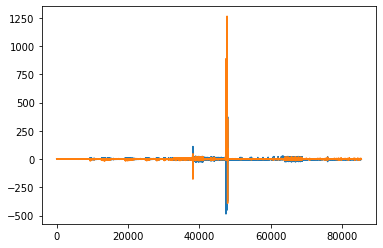

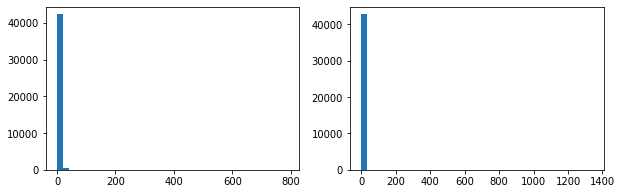

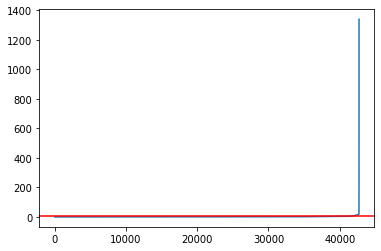

Deleted 2215 observations (5.19%) and 228 tracks (1.26%)

Correspondence matrix saved!
Defining BA input parameters...
6 cameras in total, 0 fixed and 6 to be adjusted
3 parameters per camera and 17893 3d points to be optimized
...done!

Shape of matrix A: 80524x53697
Both `ftol` and `xtol` termination conditions are satisfied.
Function evaluations 7, initial cost 1.3359e+05, final cost 9.3565e+03, first-order optimality 8.33e+05.
Optimization took 3 seconds

Error before BA (mean / median): 1.62 / 0.83
Error after  BA (mean / median): 0.59 / 0.45

0
1
2
3
4
5

Bundle adjusted projection matrices successfully saved!

image 0, RMSE calibrated RPC = 4.144126488517308e-05
image 1, RMSE calibrated RPC = 3.0434879655233824e-05
image 2, RMSE calibrated RPC = 4.339025599880818e-05
image 3, RMSE calibrated RPC = 2.5749454642447642e-05
image 4, RMSE calibrated RPC = 3.6770745795177726e-05
image 5, RMSE calibrated RPC = 5.761931980524831e-05

Bundle adjusted RPCs successfully saved!



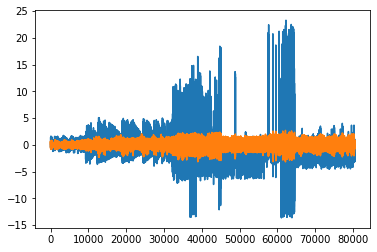

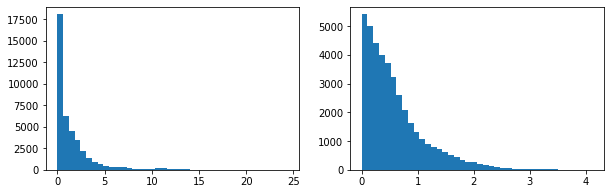

In [7]:
ba_pipeline.run()

### Visualize a feature track before and after

Displaying feature track with index 17240

3D location (initial)  : [-1772186.07846424 -5045450.3459184   3467530.3368278 ]
3D location (after BA) : [-1772214.71059177 -5045496.52194998  3467559.19502255] 

 ----> Real 2D loc in im 4  (sol) =  [1681.52697754  201.98713684]
 ----> Proj 2D loc in im 4  before BA =  [1680.85673183  202.0453974 ]
 ----> Proj 2D loc in im 4  after  BA =  [1682.03630497  201.94251236]
              Reprojection error beofre BA: 0.7285062588831579
              Reprojection error after  BA: 0.5539519144554106


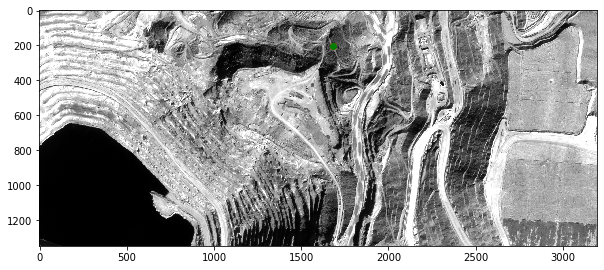

 ----> Real 2D loc in im 5  (sol) =  [1630.73071289  524.99249268]
 ----> Proj 2D loc in im 5  before BA =  [1630.94235107  524.97077978]
 ----> Proj 2D loc in im 5  after  BA =  [1630.15700611  525.04890652]
              Reprojection error beofre BA: 0.2333510723899508
              Reprojection error after  BA: 0.6301206155932277


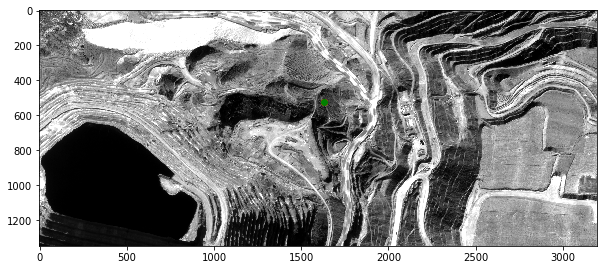

In [9]:
ba_pipeline.visualize_feature_track()

### Do the 3D points fall in the correct place?

Verify that the projection of the bounding box containing the point cloud of the scene falls in the correct area of the Earth.

In [10]:
from bundle_adjust.ba_triangulation import project_xyz_bbx_on_map

project_xyz_bbx_on_map(ba_pipeline.pts_3d_ba, map_zoom=14)

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …